In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set_theme(style="white")
import matplotlib as mpl


mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
# Set the default visibility of the spines
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.left'] = True

203


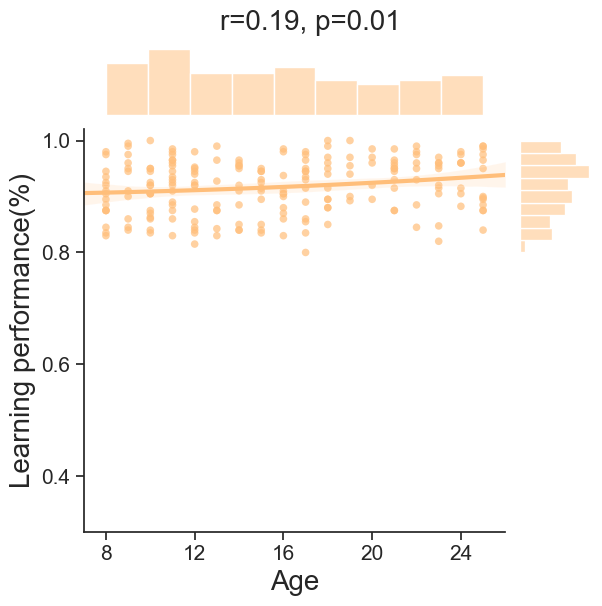

In [67]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
#data = data.query('(training_acc>0.84)|(Age>12)')
print(len(data))
# correlation
res = pearsonr(data['Age'],data['training_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="training_acc", data=data,
                  kind="reg",truncate=False,
                  xlim=(7, 26), ylim=(0.3, 1.02),
                  color='#ffbe7a', height=6,order=2,
                  scatter_kws={'s':30,'alpha':0.7,'edgecolor':'None'},
                  line_kws={'linewidth':3},
                  marginal_kws=dict(kde=False,alpha=0.5))

#move overall title up
g.set_axis_labels('Age', 'Learning performance(%)',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r={}  p<0.001'.format(round(r,2)))
else:
    g.fig.suptitle('r={}, p={}'.format(round(r,2),round(p,2)),size=20)

# Remove the box lines of the axis
g.ax_joint.spines['top'].set_visible(False)
g.ax_joint.spines['right'].set_visible(False)
g.ax_joint.spines['bottom'].set_visible(True)
g.ax_joint.spines['left'].set_visible(True)

g.ax_marg_x.spines['top'].set_visible(False)
g.ax_marg_x.spines['right'].set_visible(False)
g.ax_marg_x.spines['bottom'].set_visible(False)
g.ax_marg_x.spines['left'].set_visible(False)

g.ax_marg_y.spines['top'].set_visible(False)
g.ax_marg_y.spines['right'].set_visible(False)
g.ax_marg_y.spines['bottom'].set_visible(False)
g.ax_marg_y.spines['left'].set_visible(False)

# Setting xticks
plt.yticks([0.4, 0.6, 0.8, 1.0],size=15)
plt.xticks([8, 12, 16, 20, 24],size=15)

# Add tick lines to the bottom and left spines
g.ax_joint.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.ax_joint.tick_params(axis='y', which='both', left=True, right=False, direction='out')

#savepath = r'/mnt/workdir/DCM/Result/paper/figure1/age-training.pdf'
#g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300,transparent=True)

## Age - Game1-2D Inference

203


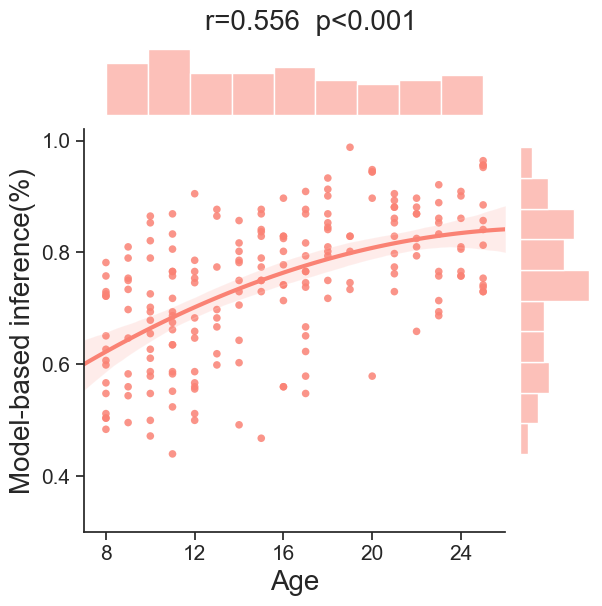

In [68]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]

print(len(data))
res = pearsonr(data['Age'],data['game1_acc'])
r = res[0]
p = res[1]
age_color = '#e36570'
# plot#FFCDB2
g = sns.jointplot(x="Age", y="game1_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 26), ylim=(0.3, 1.02),
                  color='#FA8274', height=6,order=2,
                  scatter_kws={'s':30,'alpha':0.85,'edgecolor':'None'},
                  line_kws={'linewidth':3},
                  marginal_kws=dict(kde=False,alpha=0.5))

#move overall title up
g.set_axis_labels('Age', 'Model-based inference(%)',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r={}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r={}, p:{}'.format(round(r,3),round(p,3)),size=20)

# Remove the box lines of the axis
g.ax_joint.spines['top'].set_visible(False)
g.ax_joint.spines['right'].set_visible(False)
g.ax_joint.spines['bottom'].set_visible(True)
g.ax_joint.spines['left'].set_visible(True)

g.ax_marg_x.spines['top'].set_visible(False)
g.ax_marg_x.spines['right'].set_visible(False)
g.ax_marg_x.spines['bottom'].set_visible(False)
g.ax_marg_x.spines['left'].set_visible(False)

g.ax_marg_y.spines['top'].set_visible(False)
g.ax_marg_y.spines['right'].set_visible(False)
g.ax_marg_y.spines['bottom'].set_visible(False)
g.ax_marg_y.spines['left'].set_visible(False)
# Setting xticks
plt.yticks([0.4, 0.6, 0.8, 1.0],size=15)
plt.xticks([8, 12, 16, 20, 24],size=15)

# Add tick lines to the bottom and left spines
g.ax_joint.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.ax_joint.tick_params(axis='y', which='both', left=True, right=False, direction='out')
#savepath = r'/mnt/workdir/DCM/Result/paper/figure1/age-2Dgame1.pdf'
#g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300,transparent=True)

## Age - Game2-2D Inference

193


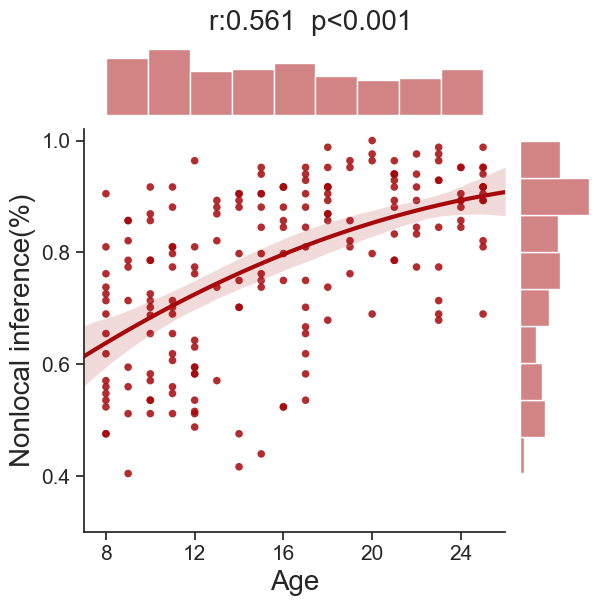

In [69]:
#age-game2
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data.query('game2_fmri>=0.5')

print(len(data))
# cal correlation
res = pearsonr(data['Age'],data['game2_test_acc'])
r = res[0]
p = res[1]
# plot
g = sns.jointplot(x="Age", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 26), ylim=(0.3, 1.02),
                  color='#A6080B', height=6,order=2,
                  scatter_kws={'s':30,'alpha':0.85,'edgecolor':'None'},
                  line_kws={'linewidth':3},
                  marginal_kws=dict(kde=False,alpha=0.5))
#move overall title up
g.set_axis_labels('Age', 'Nonlocal inference(%)',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

# Remove the box lines of the axis
g.ax_joint.spines['top'].set_visible(False)
g.ax_joint.spines['right'].set_visible(False)
g.ax_joint.spines['bottom'].set_visible(True)
g.ax_joint.spines['left'].set_visible(True)

g.ax_marg_x.spines['top'].set_visible(False)
g.ax_marg_x.spines['right'].set_visible(False)
g.ax_marg_x.spines['bottom'].set_visible(False)
g.ax_marg_x.spines['left'].set_visible(False)

g.ax_marg_y.spines['top'].set_visible(False)
g.ax_marg_y.spines['right'].set_visible(False)
g.ax_marg_y.spines['bottom'].set_visible(False)
g.ax_marg_y.spines['left'].set_visible(False)
# Setting xticks
plt.yticks([0.4, 0.6, 0.8, 1.0],size=15)
plt.xticks([8, 12, 16, 20, 24],size=15)
# Add tick lines to the bottom and left spines
g.ax_joint.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.ax_joint.tick_params(axis='y', which='both', left=True, right=False, direction='out')
#savepath = r'/mnt/workdir/DCM/Result/paper/figure1/age-2Dgame2.pdf'
#g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300,transparent=True)

##  Age effect in Game2 beyond Game1

193


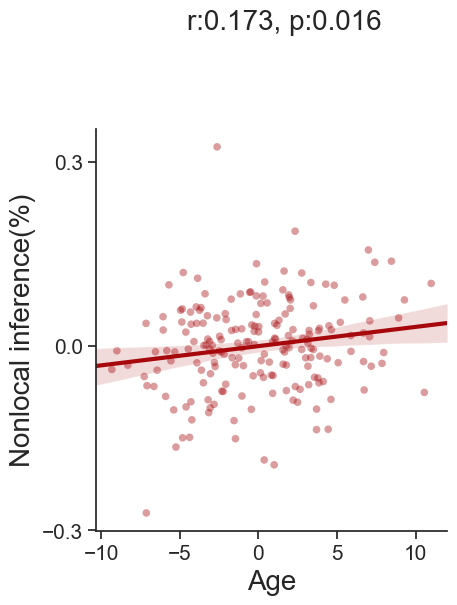

In [70]:
import statsmodels.formula.api as smf
import pingouin as pg


beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data.query('game2_fmri>=0.5')
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2
# controlling the effect of game1 and game2 training
glm1 = smf.ols('Age ~ game1_acc + game2_training_acc', data=data).fit()
glm2 = smf.ols('game2_test_acc ~ game1_acc + game2_training_acc', data=data).fit()
# Create a new DataFrame with the residuals
data['Age_resid'] = glm1.resid
data['game2_test_acc_resid'] = glm2.resid

print(len(data))

# cal correlation
res = pearsonr(data['Age_resid'], data['game2_test_acc_resid'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age_resid", y="game2_test_acc_resid", data=data,
                  kind="reg", truncate=False,
                  #xlim=(7, 26), ylim=(0.3, 1.02),
                  color='#A6080B', height=6, order=1,
                  scatter_kws={'s':30,'alpha':0.4,'edgecolor':'None'},
                  line_kws={'linewidth':3},marginal_kws=dict(kde=False,alpha=0.5))
g.ax_marg_x.remove()
g.ax_marg_y.remove()
g.fig.set_size_inches(5,6)
#move overall title up
g.set_axis_labels('Age', 'Nonlocal inference(%)',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

# Remove the box lines of the axis
g.ax_joint.spines['top'].set_visible(False)
g.ax_joint.spines['right'].set_visible(False)
g.ax_joint.spines['bottom'].set_visible(True)
g.ax_joint.spines['left'].set_visible(True)

g.ax_marg_x.spines['top'].set_visible(False)

g.ax_marg_x.spines['right'].set_visible(False)
g.ax_marg_x.spines['bottom'].set_visible(False)
g.ax_marg_x.spines['left'].set_visible(False)

g.ax_marg_y.spines['top'].set_visible(False)
g.ax_marg_y.spines['right'].set_visible(False)
g.ax_marg_y.spines['bottom'].set_visible(False)
g.ax_marg_y.spines['left'].set_visible(False)

# Setting xticks
plt.yticks([-0.3, 0, 0.3],size=15)
plt.xticks([-10, -5, 0, 5, 10],size=15)
# Add tick lines to the bottom and left spines
g.ax_joint.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.ax_joint.tick_params(axis='y', which='both', left=True, right=False, direction='out')

savepath = r'/mnt/workdir/DCM/Result/paper/figure1/age-game2_beyond_game1.pdf'
g.savefig(savepath,bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

In [71]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')

data = data[data['game1_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

pg.partial_corr(data=data, x='Age', y='game1_acc', covar=['training_acc'])

,n,r,CI95%,p-val
pearson,203,0.54489,"[0.44, 0.64]",5.140591e-17


In [72]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')

data = data[data['game2_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2

pg.partial_corr(data=data, x='Age', y='game2_test_acc', covar=['training_acc'])

,n,r,CI95%,p-val
pearson,193,0.544128,"[0.44, 0.64]",3.435863e-16


In [73]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')

data = data[data['game2_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2

pg.partial_corr(data=data, x='Age', y='game2_test_acc', covar=['training_acc','game1_acc','game2_training_acc'])

,n,r,CI95%,p-val
pearson,193,0.168878,"[0.03, 0.3]",0.019848


In [6]:
import pandas as pd
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_fmri']>=0.5]
# game2_train_ap =  data['game2_train_ap'].to_list()
# game2_train_ap = [float(p) for p in game2_train_ap]
# data['game2_train_ap'] = game2_train_ap

data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_dp'])/2
print(len(data))

data['Map-based inference'] = data['game1_acc']
data['Memory performance'] = data['game2_training_acc']
data['Nonlocal inference based on new knowledge'] = data['game2_test_acc']

X = data[['Age','Map-based inference',"Memory performance"]]
Y = data['Nonlocal inference based on new knowledge']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

193
                                        OLS Regression Results                                       
Dep. Variable:     Nonlocal inference based on new knowledge   R-squared:                       0.760
Model:                                                   OLS   Adj. R-squared:                  0.757
Method:                                        Least Squares   F-statistic:                     200.0
Date:                                       Tue, 10 Oct 2023   Prob (F-statistic):           2.17e-58
Time:                                               21:12:34   Log-Likelihood:                 231.71
No. Observations:                                        193   AIC:                            -455.4
Df Residuals:                                            189   BIC:                            -442.4
Df Model:                                                  3                                         
Covariance Type:                                   nonrobust                  

In [9]:
results_as_html = model_summary.tables[1].as_html()
result_table = pd.read_html(results_as_html, header=0, index_col=0)[0]
result_table.to_csv(r'/mnt/workdir/DCM/Result/paper/figure1/age-game2_beyond_game1.csv')